In [1]:
from network_utils import *



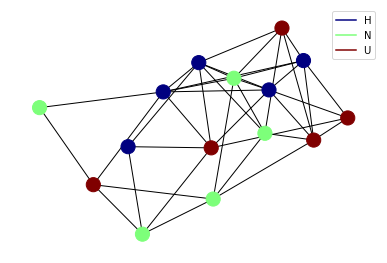

In [2]:
size = 15
mem_dist = generate_membership_dist(size)
mem_map = generate_size_dist(mem_dist)
G = fill_graph(size, mem_map)
viz_graph(G)